In this there is a simple model which called weak learner .the weak leaner is a model which can be trained on the data and can make a
prediction on the data .probably he will increase which was miscategorize (means highlight) the data which is misclassify by the previous model so that next model learn,perform the operation and finally after combine the result we get desired output

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [34]:
df=pd.read_csv('../DATA/mushrooms.csv')

In [35]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Data Source: https://archive.ics.uci.edu/ml/datasets/Mushroom


This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.


Attribute Information:

1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

<Axes: xlabel='class', ylabel='count'>

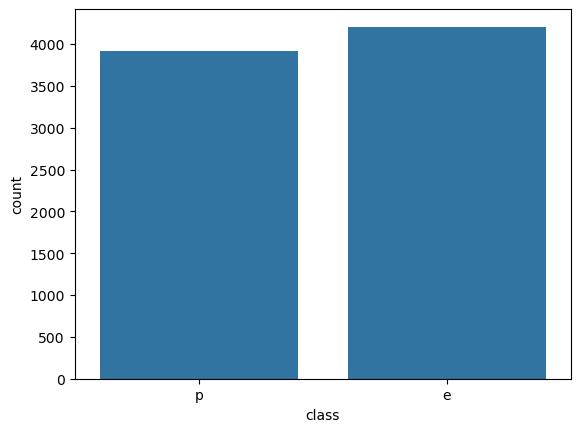

In [36]:
sns.countplot(data=df,x='class')

In [37]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [38]:
df.describe().transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [39]:
feat_uni=df.describe().transpose().reset_index().sort_values('unique')

In [40]:
feat_uni

,index,count,unique,top,freq
16,veil-type,8124,1,p,8124
0,class,8124,2,e,4208
4,bruises,8124,2,f,4748
6,gill-attachment,8124,2,f,7914
7,gill-spacing,8124,2,c,6812
8,gill-size,8124,2,b,5612
10,stalk-shape,8124,2,t,4608
18,ring-number,8124,3,o,7488
2,cap-surface,8124,4,y,3244
17,veil-color,8124,4,w,7924


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22],
 [Text(0, 0, 'veil-type'),
  Text(1, 0, 'class'),
  Text(2, 0, 'bruises'),
  Text(3, 0, 'gill-attachment'),
  Text(4, 0, 'gill-spacing'),
  Text(5, 0, 'gill-size'),
  Text(6, 0, 'stalk-shape'),
  Text(7, 0, 'ring-number'),
  Text(8, 0, 'cap-surface'),
  Text(9, 0, 'veil-color'),
  Text(10, 0, 'stalk-surface-below-ring'),
  Text(11, 0, 'stalk-surface-above-ring'),
  Text(12, 0, 'ring-type'),
  Text(13, 0, 'stalk-root'),
  Text(14, 0, 'cap-shape'),
  Text(15, 0, 'population'),
  Text(16, 0, 'habitat'),
  Text(17, 0, 'stalk-color-above-ring'),
  Text(18, 0, 'stalk-color-below-ring'),
  Text(19, 0, 'odor'),
  Text(20, 0, 'spore-print-color'),
  Text(21, 0, 'cap-color'),
  Text(22, 0, 'gill-color')])

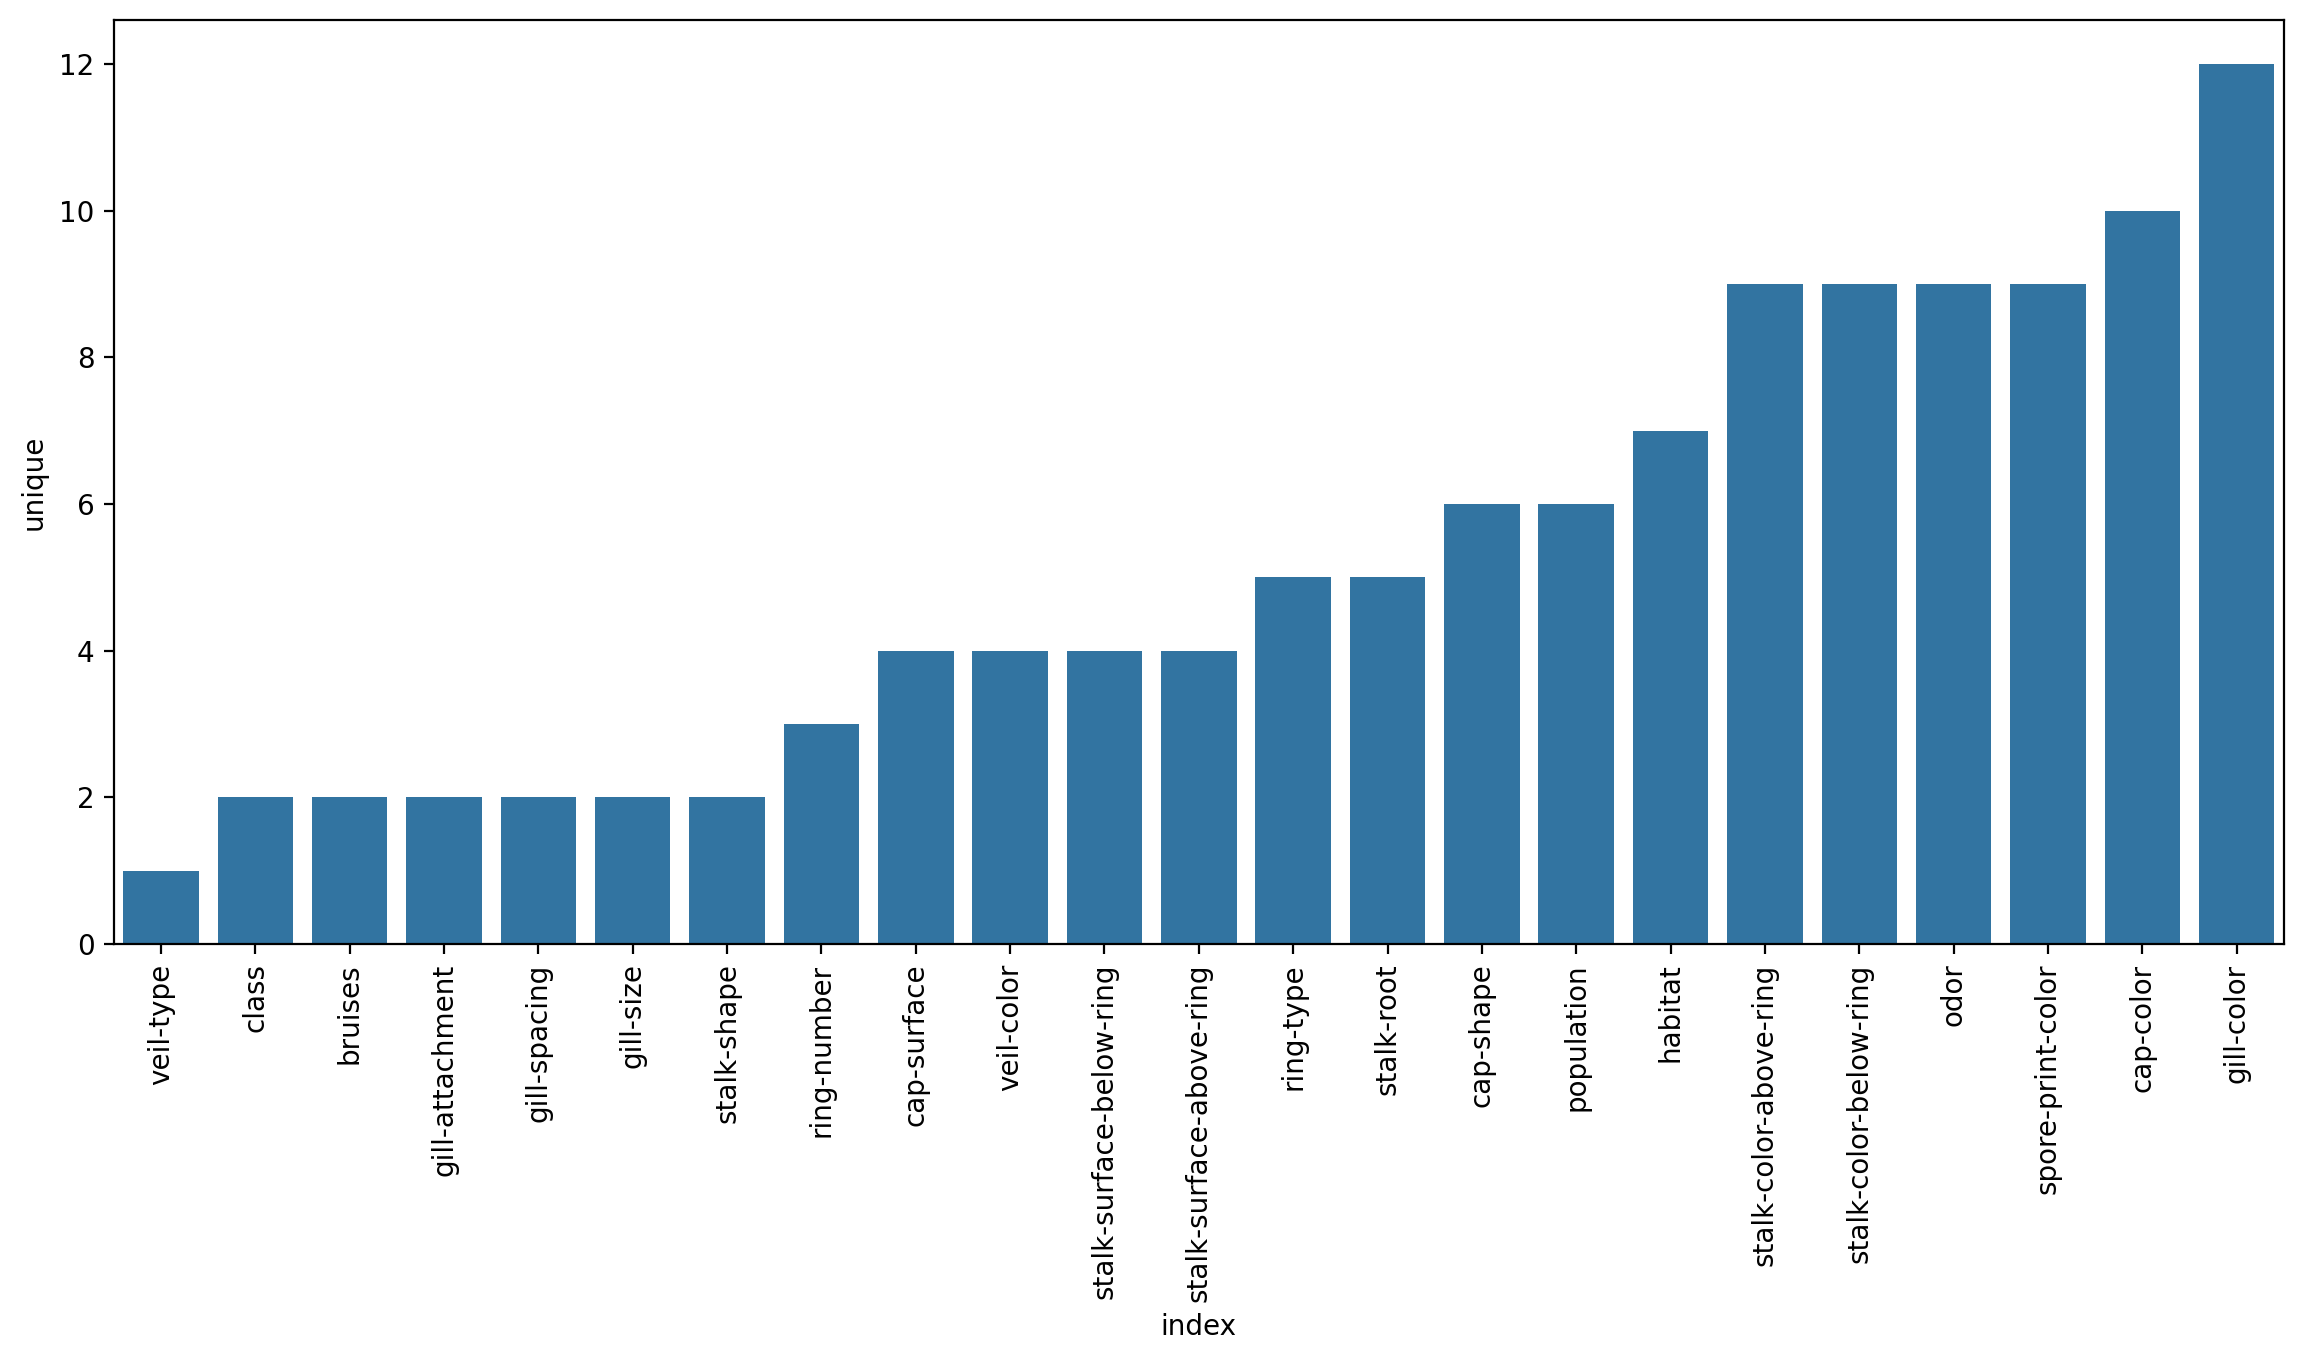

In [41]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=feat_uni,x='index',y='unique')
plt.xticks(rotation=90)


In [42]:
X=df.drop('class',axis=1)

In [43]:
X.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [44]:
X=pd.get_dummies(X,drop_first=True)

In [45]:
y=df['class']

In [46]:
from sklearn.model_selection import  train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.15, random_state=101)

In [48]:
from sklearn.ensemble import AdaBoostClassifier

In [49]:
model=AdaBoostClassifier(n_estimators=1)

In [50]:
model.fit(X_train,y_train)

c:\Users\parth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=1)

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

In [52]:
preds=model.predict(X_test)

In [53]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [54]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [55]:
model.feature_importances_.argmax() # report the feature with the highest importance

22

In [56]:
X.columns[22]

'odor_n'

<Axes: xlabel='odor', ylabel='count'>

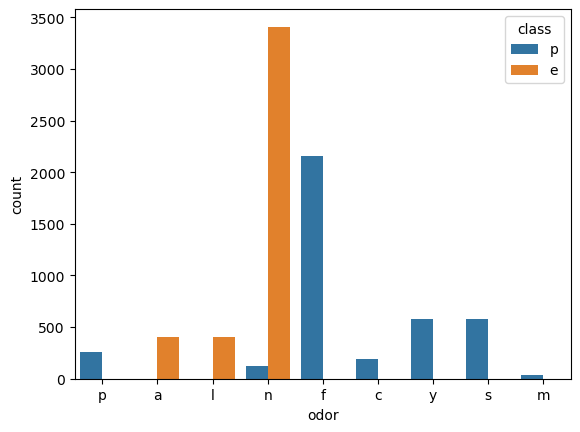

In [57]:
sns.countplot(data=df,x='odor',hue='class')

In [58]:
len(X.columns)

95

In [59]:
err_rate=[]
for n in range(1,96):
    model=AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)

    error=1-accuracy_score(y_test,y_pred)
    err_rate.append(error)

c:\Users\parth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\parth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\parth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\parth\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\par

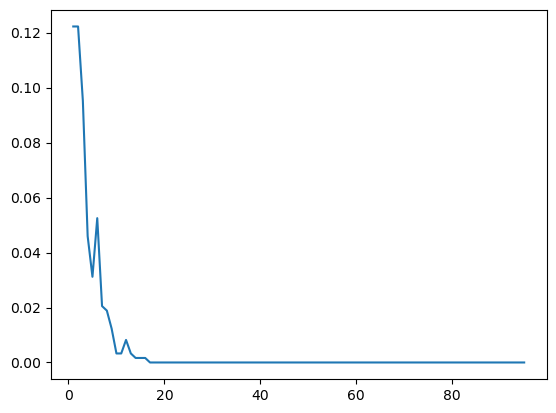

In [60]:
plt.plot(range(1,96),err_rate)

In [61]:
model

AdaBoostClassifier(n_estimators=95)

In [62]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01052632, 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.        ,
       0.01052632, 0.        , 0.05263158, 0.03157895, 0.03157895,
       0.        , 0.        , 0.06315789, 0.02105263, 0.        ,
       0.        , 0.        , 0.09473684, 0.09473684, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01052632, 0.01052632, 0.        , 0.        , 0.        ,
       0.06315789, 0.        , 0.        , 0.        , 0.        ,
       0.03157895, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.06315789, 0.        , 0.        ,
       0.01052632, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.01052632, 0.        , 0.        , 0.     

In [65]:
feat=pd.DataFrame(index=X.columns,data=model.feature_importances_,columns=['Importance'])

In [68]:
imp_feat=feat[feat['Importance']>0]

In [69]:
imp_feat

,Importance
cap-color_c,0.010526
cap-color_n,0.010526
cap-color_w,0.010526
bruises_t,0.052632
odor_c,0.031579
odor_f,0.031579
odor_n,0.063158
odor_p,0.021053
gill-spacing_w,0.094737
gill-size_n,0.094737


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21],
 [Text(0, 0, 'cap-color_c'),
  Text(1, 0, 'cap-color_n'),
  Text(2, 0, 'cap-color_w'),
  Text(3, 0, 'bruises_t'),
  Text(4, 0, 'odor_c'),
  Text(5, 0, 'odor_f'),
  Text(6, 0, 'odor_n'),
  Text(7, 0, 'odor_p'),
  Text(8, 0, 'gill-spacing_w'),
  Text(9, 0, 'gill-size_n'),
  Text(10, 0, 'stalk-shape_t'),
  Text(11, 0, 'stalk-root_b'),
  Text(12, 0, 'stalk-surface-above-ring_k'),
  Text(13, 0, 'stalk-surface-below-ring_y'),
  Text(14, 0, 'stalk-color-below-ring_n'),
  Text(15, 0, 'stalk-color-below-ring_w'),
  Text(16, 0, 'ring-number_t'),
  Text(17, 0, 'spore-print-color_r'),
  Text(18, 0, 'spore-print-color_w'),
  Text(19, 0, 'population_c'),
  Text(20, 0, 'population_v'),
  Text(21, 0, 'habitat_w')])

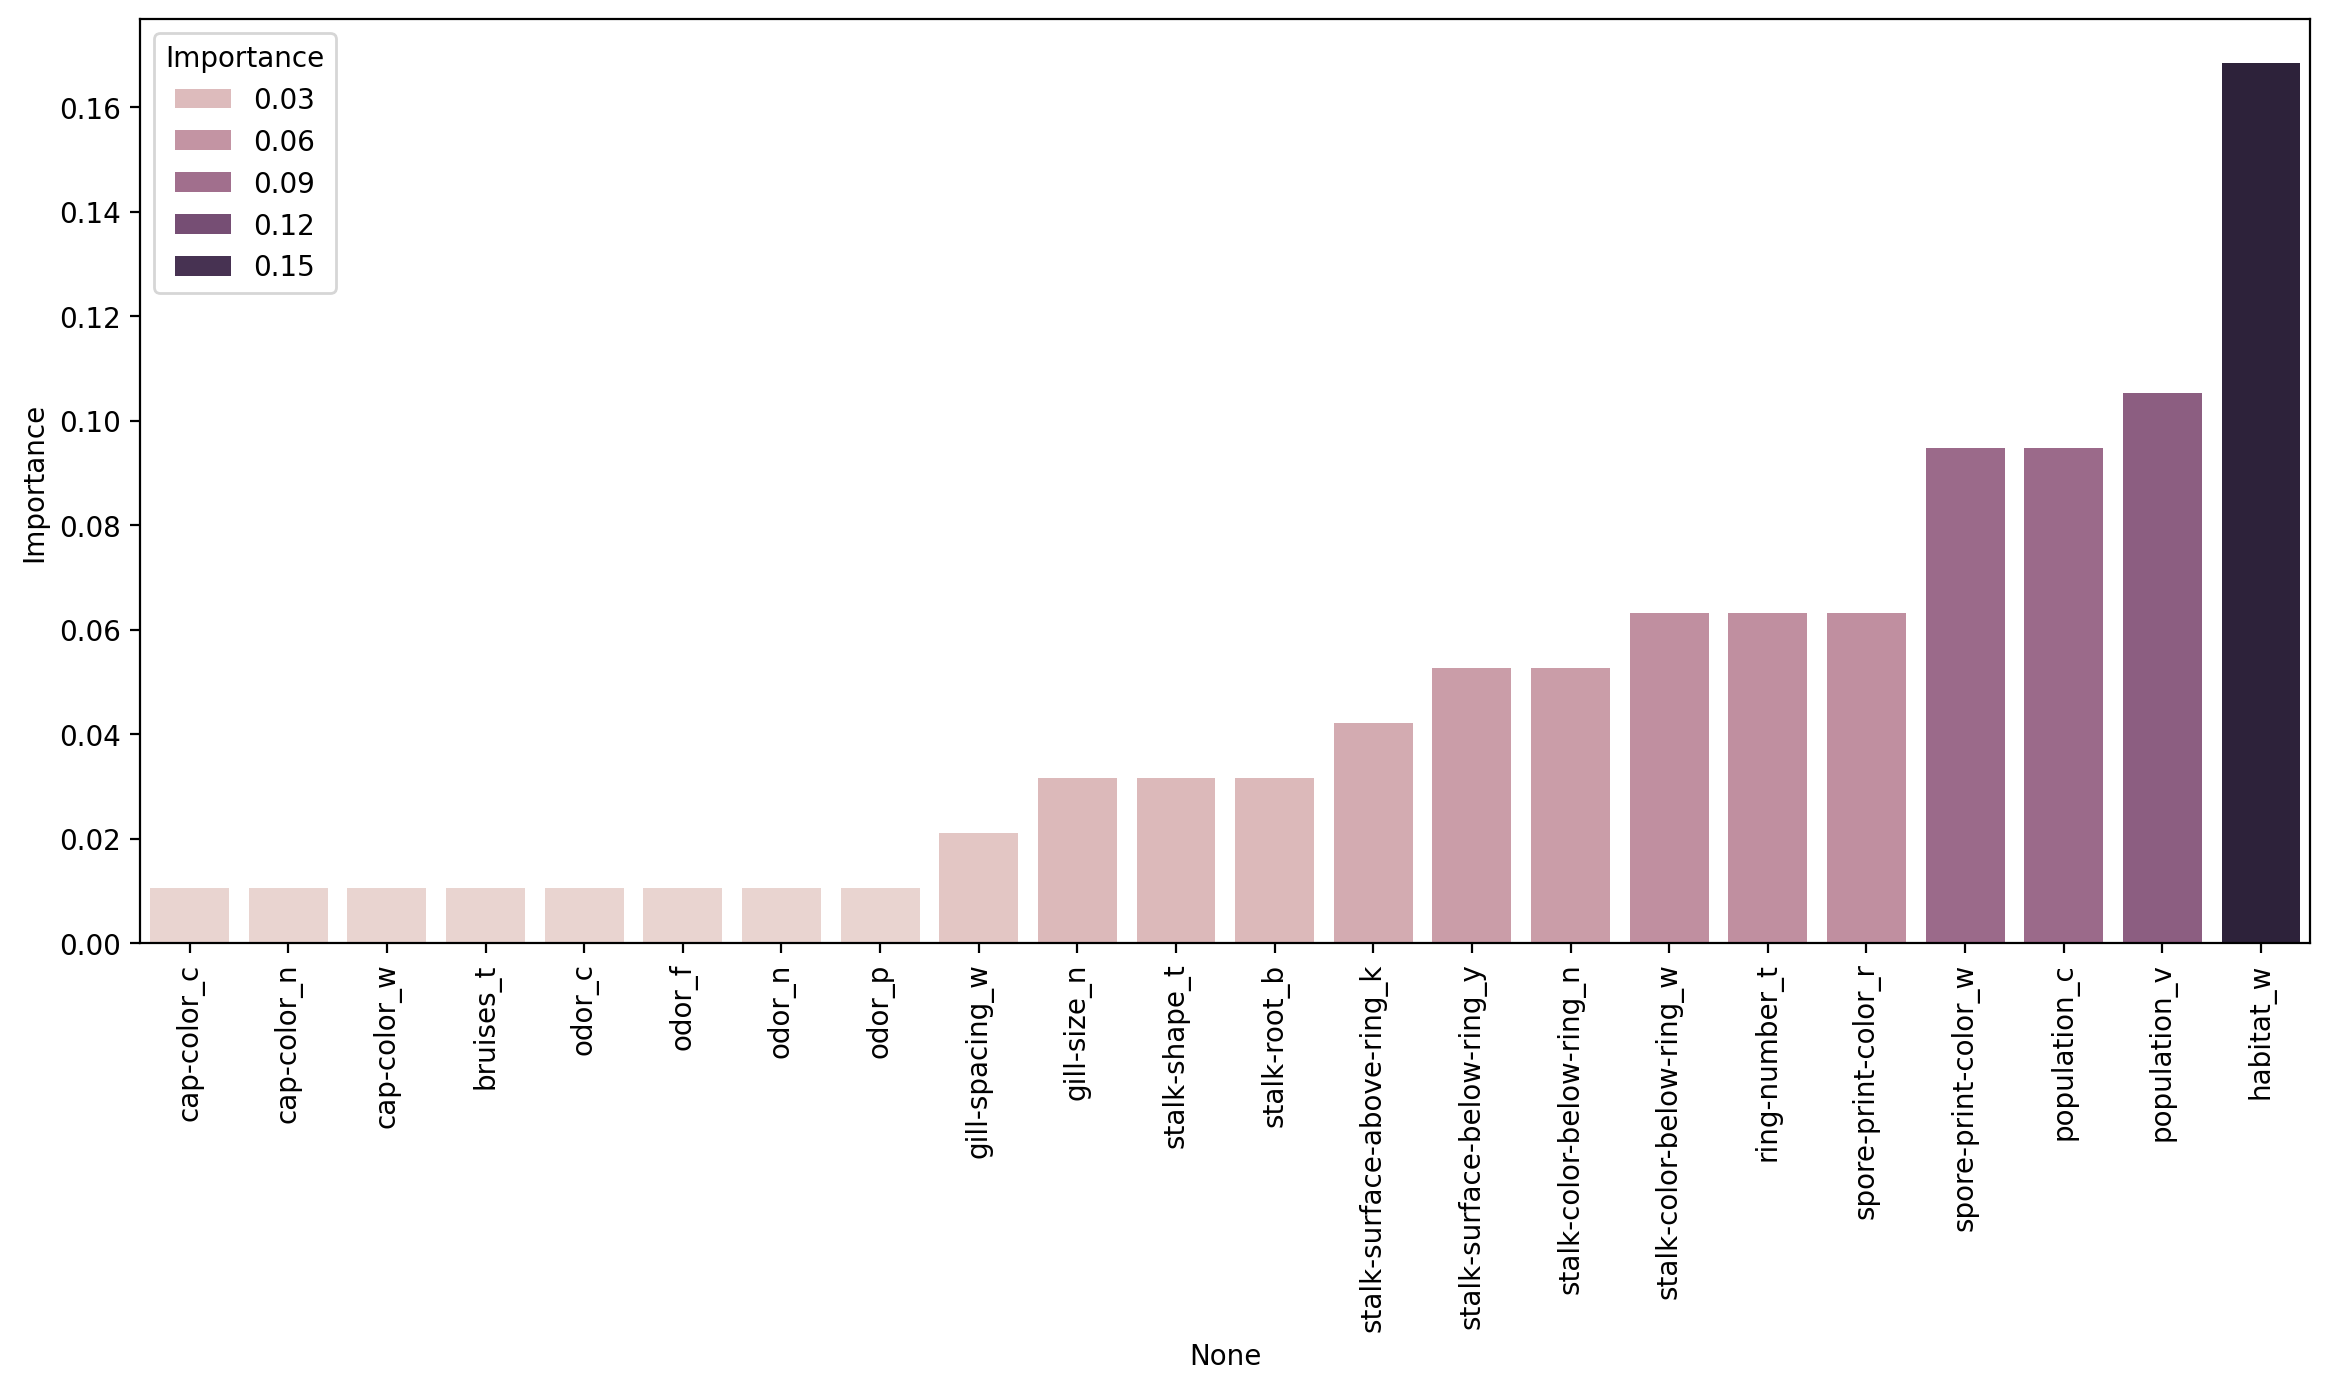

In [ ]:
plt.figure(figsize=(14,6),dpi=200)
sns.barplot(data=imp_feat.sort_values("Importance"),x=imp_feat.index,y='Importance')
plt.xticks(rotation=90)